# Simulation of a positron-induced Muon Source (part 1)


### Authors:
* Saverio Monaco
* Marianna Zeragic De Giorgio
* Gerardo Javier Carmona
* Hilario Capettini 

### Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$. To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process. 


### References

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* [2018 Experiment](https://arxiv.org/pdf/1909.13716.pdf): the paper describing the (very poor..) results of the experiment carried out in summer 2018
* [2021 proposal](https://cds.cern.ch/record/2712394?ln=en): the proposal for the experiment in 2021


### Contact

* Marco Zanetti <marco.zanetti@unipd.it>
* Camilla Curatolo <camilla.curatolo@pd.infn.it>
* Jacopo Pazzini <jacopo.pazzini@unipd.it>
* Alberto Zucchetta <alberto.zucchetta@pd.infn.it>

## Analytical part

1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

2. compute and display the angle and momentum components distributions of the emerging muon pairs;

3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;

In [1]:
#Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate

In [2]:
#Define the important constants
muon_mass     = 0.1056583745       #[GeV]
electrom_mass = 0.00051099894      #[GeV]
c = 299792458                     #[m/s]
alpha = 0.007297                  #[]
#Derivated constants


In [3]:
def cros_section(rs):
    y = np.pi * alpha**2 / (4*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (13/12 + 2/3 * muon_mass**2 / rs**2)
    return y
    
def dif_cross_section(rs,theta):
    y = alpha**2/(16 * rs**2)* np.sqrt(1/4 - muon_mass**2/rs**2)
    y = y *(1 + muon_mass**2 / rs**2 + (1/4 -muon_mass**2/rs**2)*np.cos(theta)**2)
    return y

def pdf_theta(rs,theta):
    y = 2*np.pi *np.sin(theta)*dif_cross_section(rs,theta)
    return y
    
def pdf_theta_normalized(rs,theta):
    y =pdf_theta(rs,theta)/cros_section(rs)
    return y

In [4]:
#Plot the differential cross section against energy 
#Plot the differential cross section against theta
#Plot the total cross section against energy

## Monte Carlo Simulation

4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; 
5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);
6. assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;
7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;


In [5]:
#Inputs

N =10**5                  #Number of samples
E = 0.216                 #Beam energy

box = [0,np.pi,0.0,0.5] #Box coordinates [x0,x1,y0,y1] for analysis
                        #We choose the size to optimize the ammount of useful particles

In [6]:
#Temporal until we find the correct distribution
#Boltzman distribution

def distribution(theta):
    rs = E  
    y = pdf_theta_normalized(rs,theta) 
    return y

In [10]:
#Check of the normalization
x2 = lambda x: distribution(x)
integrate.quad(x2, 0., np.pi)[0]

1.0

In [8]:
def accept_reject(N,distribution,box):
    x = np.random.uniform(box[0], box[1], N)
    y = np.random.uniform(box[2], box[3], N)
    
    accepted = x[y<=distribution(x)]
    plt.plot(x,y)
    plt.show
    return accepted
   

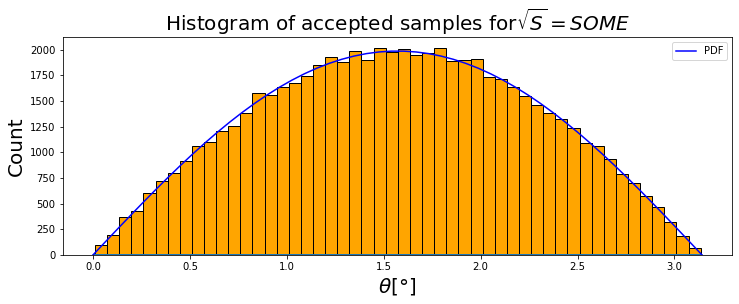

In [9]:
# Plot scaled histogram
fig, ax = plt.subplots(figsize=(12,4))

n, bins, _ = ax.hist(accept_reject(N,distribution,box), bins=50,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()

theta = np.linspace(box[0], box[1])
ax.plot(theta, distribution(theta)*scaling,color='blue', label='PDF')


plt.title('Histogram of accepted samples for'r'$ \sqrt{S}=SOME$', fontsize=20)
plt.xlabel(r'$ \theta [°]$', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.show()

In [148]:
#Comparison with BabaYaga algorithm



In [ ]:
#Obtain the muons momenta and build the file  (Is it in the CoM frame?)


In [ ]:
#Boost the results to the laboratory frame


In [ ]:
#Realistic target

In [ ]:
#Realistic beam

## Aditional considerations

8. given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;
9. (optional) take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.

